In [65]:
import pandas as pd

df = pd.read_csv("../results.csv")
# strip column names
df.columns = [
    col.strip() for col in df.columns
]
df["player_1_won"] = df["player_1_won"] == " True"
df["player_2_won"] = ~df["player_1_won"]
df

,id,player_1_model,player_1_temperature,player_2_model,player_2_temperature,player_1_won,player_2_won
0,20240323230703,mistral:mistral-large-latest,0.0,openai:gpt-4-turbo-preview,0.0,False,True
1,20240323230954,mistral:mistral-small-latest,0.0,mistral:mistral-small-latest,0.0,False,True
2,20240323231220,mistral:mistral-small-latest,0.0,mistral:mistral-small-latest,0.0,True,False
3,20240324004638,mistral:mistral-small-latest,0.0,mistral:mistral-small-latest,0.0,True,False
4,20240324012356,mistral:mistral-large-latest,0.0,openai:gpt-4,0.0,False,True
...,...,...,...,...,...,...,...
226,20240324094611,mistral:mistral-medium-latest,0.0,openai:gpt-4-0125-preview,0.0,False,True
227,20240324094638,openai:gpt-4-0125-preview,0.0,mistral:mistral-large-latest,0.0,True,False
228,20240324094705,openai:gpt-4,0.0,mistral:mistral-small-latest,0.0,True,False
229,20240324094705,openai:gpt-4,0.0,openai:gpt-3.5-turbo-0125,0.0,True,False


In [66]:
df["player_1_won"].value_counts()

player_1_won
False    118
True     113
Name: count, dtype: int64

In [67]:
# Compute the number of wins for each model 

unique_models = df["player_1_model"].unique().tolist()
unique_models += df["player_2_model"].unique().tolist()
unique_models = list(set(unique_models))

# For each model, compute the number of wins (player_1 won if it's player 1), the number of games played and the win rate
results = []
for model in unique_models:
    games_played = 0
    wins = 0
    for i, row in df.iterrows():
        if row["player_1_model"] == model and row["player_2_model"] != model:
            games_played += 1
            if row["player_1_won"]:
                wins += 1
            continue
        if row["player_2_model"] == model and row["player_1_model"] != model:
            games_played += 1
            if row["player_2_won"]:
                wins += 1
            continue
    win_rate = wins / games_played
    results.append({
        "model": model,
        "games_won": wins,
        "games_played": games_played,
        "win_rate": win_rate
    })

# Cast to df 
results_df = pd.DataFrame(results)
results_df.sort_values(by="win_rate", ascending=False, inplace=True)
results_df = results_df[results_df["games_played"] > 1]
results_df

,model,games_won,games_played,win_rate
4,openai:gpt-3.5-turbo-0125,31,37,0.837838
0,openai:gpt-4-1106-preview,27,37,0.729730
6,mistral:mistral-small-latest,51,77,0.662338
1,openai:gpt-4,32,54,0.592593
7,openai:gpt-4-0125-preview,16,37,0.432432
5,mistral:mistral-medium-latest,20,74,0.270270
3,mistral:mistral-large-latest,15,69,0.217391


In [68]:
results_df.to_markdown()

'|    | model                         |   games_won |   games_played |   win_rate |\n|---:|:------------------------------|------------:|---------------:|-----------:|\n|  4 | openai:gpt-3.5-turbo-0125     |          31 |             37 |   0.837838 |\n|  0 | openai:gpt-4-1106-preview     |          27 |             37 |   0.72973  |\n|  6 | mistral:mistral-small-latest  |          51 |             77 |   0.662338 |\n|  1 | openai:gpt-4                  |          32 |             54 |   0.592593 |\n|  7 | openai:gpt-4-0125-preview     |          16 |             37 |   0.432432 |\n|  5 | mistral:mistral-medium-latest |          20 |             74 |   0.27027  |\n|  3 | mistral:mistral-large-latest  |          15 |             69 |   0.217391 |'

In [69]:
results = []

for model_1 in unique_models:
    for model_2 in unique_models:
        games_played = 0
        wins = 0
        for i, row in df.iterrows():
            if row["player_1_model"] == model_1 and row["player_2_model"] == model_2:
                games_played += 1
                if row["player_1_won"]:
                    wins += 1
                continue
            if row["player_2_model"] == model_1 and row["player_1_model"] == model_2:
                games_played += 1
                if row["player_2_won"]:
                    wins += 1
                continue
        try:
            win_rate = wins / games_played
        except:
            win_rate = 0
        results.append({
            "model_1": model_1,
            "model_2": model_2,
            "games_won": wins,
            "games_played": games_played,
            "win_rate": win_rate
        })
results_df = pd.DataFrame(results)
results_df

,model_1,model_2,games_won,games_played,win_rate
0,openai:gpt-4-1106-preview,openai:gpt-4-1106-preview,0,0,0.000000
1,openai:gpt-4-1106-preview,openai:gpt-4,2,2,1.000000
2,openai:gpt-4-1106-preview,openai:gpt-4-turbo-preview,0,0,0.000000
3,openai:gpt-4-1106-preview,mistral:mistral-large-latest,3,4,0.750000
4,openai:gpt-4-1106-preview,openai:gpt-3.5-turbo-0125,0,2,0.000000
...,...,...,...,...,...
59,openai:gpt-4-0125-preview,mistral:mistral-large-latest,9,12,0.750000
60,openai:gpt-4-0125-preview,openai:gpt-3.5-turbo-0125,1,2,0.500000
61,openai:gpt-4-0125-preview,mistral:mistral-medium-latest,4,5,0.800000
62,openai:gpt-4-0125-preview,mistral:mistral-small-latest,2,15,0.133333


In [70]:
# Display results df in a matrix

results_matrix = results_df.pivot(index="model_1", columns="model_2", values="win_rate")
results_matrix


model_2,mistral:mistral-large-latest,mistral:mistral-medium-latest,mistral:mistral-small-latest,openai:gpt-3.5-turbo-0125,openai:gpt-4,openai:gpt-4-0125-preview,openai:gpt-4-1106-preview,openai:gpt-4-turbo-preview
model_1,,,,,,,,
mistral:mistral-large-latest,1.000000,0.555556,0.000000,0.142857,0.000000,0.250000,0.250000,0.0
mistral:mistral-medium-latest,0.444444,0.428571,0.625000,0.000000,0.277778,0.200000,0.066667,0.0
mistral:mistral-small-latest,1.000000,0.375000,0.615385,0.230769,0.764706,0.866667,0.545455,0.0
openai:gpt-3.5-turbo-0125,0.857143,1.000000,0.769231,1.000000,0.666667,0.500000,1.000000,0.0
openai:gpt-4,1.000000,0.722222,0.235294,0.333333,0.500000,0.000000,0.000000,0.0
openai:gpt-4-0125-preview,0.750000,0.800000,0.133333,0.500000,0.000000,0.500000,0.000000,0.0
openai:gpt-4-1106-preview,0.750000,0.933333,0.454545,0.000000,1.000000,1.000000,0.000000,0.0
openai:gpt-4-turbo-preview,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


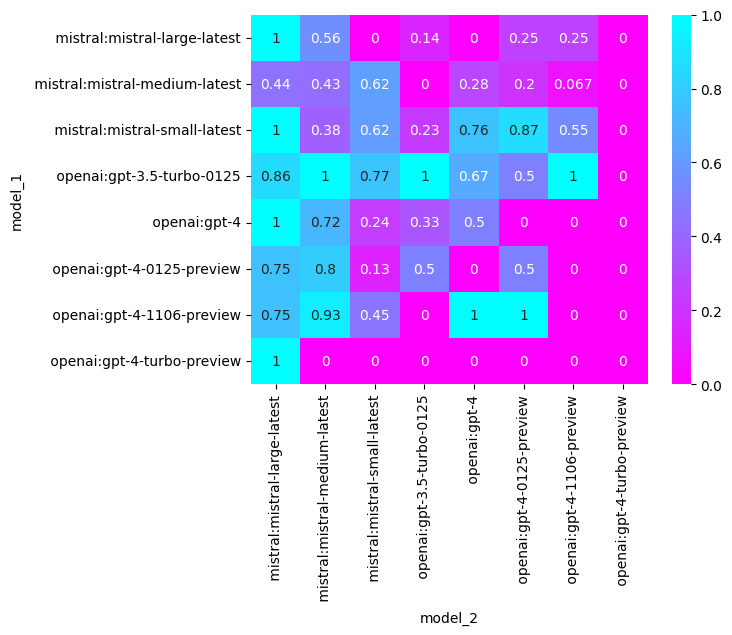

In [72]:
# Make a heatmap
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(results_matrix, annot=True, 
            # cmap from white to blue
            cmap="Blues",
            )
# plt.xticks(rotation=-45)

plt.show()